Sketch out tweaks/new routines for visualizing results from the sampling experiments.

In [29]:
import os, pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set(style='ticks', context='talk')

/Users/daniel/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Autoload extension

In [105]:
%load_ext autoreload
%autoreload 2

First, load in one experiment's data. We'll try using the normal sampling dataset, for starters.

The dataset contains the parameters and model/parameterization evaluations for each of the 10,000 samplesets. Where indicated, parameters prefixed with `log` are the $\log_{10}$ value of those quantities. *All* of the function evaluates are stored as the $\log_{10}$ of their true values. The following variables are available in the dataset:

- **Smax**: Calculated supersaturation maxima for parcel and *all* parameterizations
- **Neq/Nkn**: Calculated equilibrium/kinetically limited droplet number concentration, for parcel model. For parameterizations, these are the chaos expansions predicting these quantities.
- **Nderiv**: Calculated diagnosed droplet number concentration, for parameterizations only.


In [228]:
import plot_utils as pu

exp_name = "MARC_main"
exp_base = exp_name.split("_")[1]
results_df = pu.get_data(exp_name)
print(results_df.head())
for col in results_df.columns:
    print(col)

   logN_ACC  logN_MOS  logN_MBS  logmu_ACC  logmu_MOS  logmu_MBS  kappa_MOS  \
0     0.226     2.507     2.308     -0.091     -2.328     -2.538      0.176   
1     3.593    -1.456     1.178     -1.846     -1.495     -1.981      0.508   
2    -1.549    -1.163    -2.123     -1.362     -2.452     -1.383      0.107   
3    -1.342    -1.238     1.318     -2.922     -1.761     -2.910      0.264   
4    -0.765     3.598     1.699     -0.549     -2.887     -2.496      0.139   

    logV        T          P     ...      Neq_main_3  Nkn_main_3  Smax_main_4  \
0 -1.804  246.206  69948.837     ...          -0.396       2.918       -2.884   
1 -0.500  271.329  61065.420     ...           2.543       1.745       -2.232   
2  0.325  259.737  81892.246     ...          -0.296      -0.389       -0.508   
3 -1.826  265.755  74323.672     ...          -1.751       1.358       -1.984   
4 -0.643  241.847  93881.479     ...           1.164       4.338       -1.613   

   Nderiv_main_4  Neq_main_4  Nkn_main

**Plot 1:** one-one comparison b/t parameterizations and parcel model

main_3
Smax_oneone.main_3.MARC_main
main_4
Smax_oneone.main_4.MARC_main
ARG
Smax_oneone.ARG.MARC_main
MBN
Smax_oneone.MBN.MARC_main


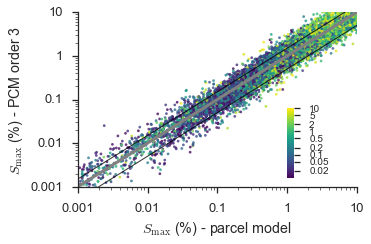

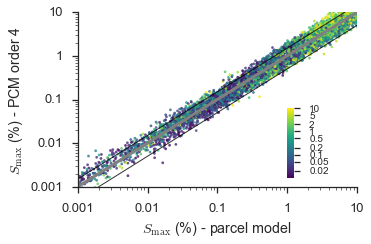

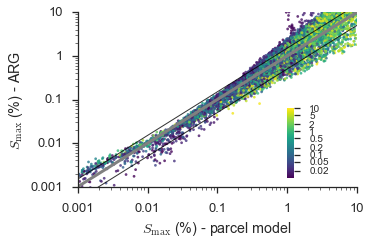

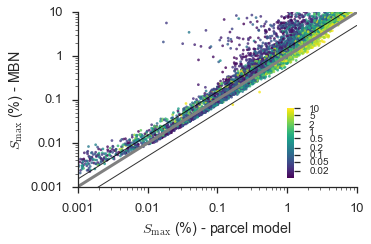

In [229]:
# Smax

var_name = "Smax"
var_label = '$S_\mathrm{max}$ (%)'
lims = 1e-3, 10.
parcel_data = np.power(10., results_df[var_name+"_parcel"])
coloring = np.power(10., results_df['logV'])
coloring_ticks = [0.02, 0.05, 0.1, 0.2, 0.5, 1., 2.0, 5., 10.]

param_settings = [
    # ( name, label )
    (exp_base+'_3', 'PCM order 3'),
    (exp_base+'_4', 'PCM order 4'),
    ('ARG', 'ARG'),
    ('MBN', 'MBN'),
]
for param_name, param_label in param_settings:
    print(param_name)
    scheme_data = np.power(10., results_df[var_name+"_"+param_name])
    
    # Mask egregious outlier data
    data_df = pd.DataFrame({'scheme': scheme_data,
                            'parcel': parcel_data,
                            'coloring': coloring})
    
    # Convert to supersaturation in %
    data_df['scheme'] *= 100
    data_df['parcel'] *= 100
    
    # Note that the data is all log data, so we're masking truly outlier
    # points here
    data_df[data_df > 1e10] = np.nan
    data_df[data_df < 0.] = np.nan
    data_df.dropna(inplace=True)

    fig, ax = pu.plot_oneone(data_df['parcel'], data_df['scheme'],
                             var_label, param_label,
                             color_data=data_df['coloring'], 
                             color_ticks=coloring_ticks,
                             color_bar=True, lims=lims)

    fig_fn = "{}_oneone.{}.{}".format(var_name, param_name, exp_name)
    print(fig_fn)
    plt.savefig("figs/"+fig_fn+".png", transparent=True, bbox_inches='tight',
                dpi=200)
    plt.savefig("figs/"+fig_fn+".pdf", transparent=True, bbox_inches='tight')

main_3
main_4
ARG
MBN


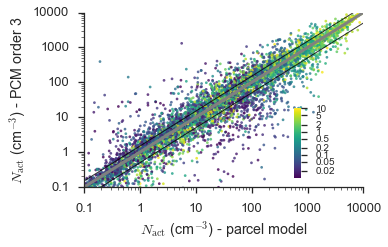

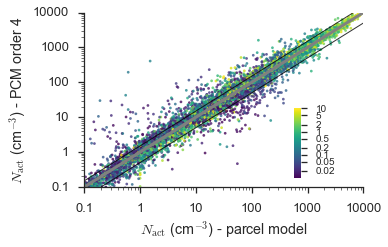

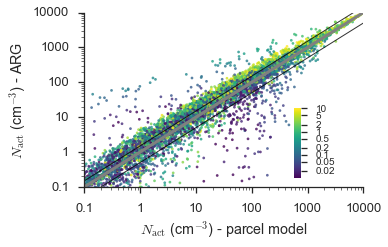

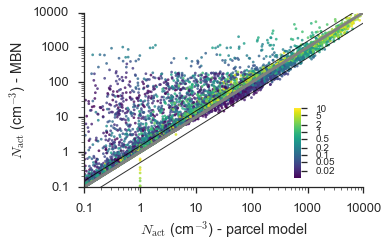

In [230]:
# Neq - derived

var_name = "Nact"
var_label = '$N_\mathrm{act}$ (cm$^{-3}$)'
lims = 1e-1, 1e4
parcel_data = np.power(10., results_df["Neq"+"_parcel"])
coloring = np.power(10., results_df['logV'])
coloring_ticks = [0.02, 0.05, 0.1, 0.2, 0.5, 1., 2.0, 5., 10.]

param_settings = [
    # ( name, label )
    (exp_base+'_3', 'PCM order 3'),
    (exp_base+'_4', 'PCM order 4'),
    ('ARG', 'ARG'),
    ('MBN', 'MBN'),
]
for param_name, param_label in param_settings:
    print(param_name)
    scheme_data = np.power(10., results_df["Nderiv"+"_"+param_name])
    
    # Mask egregious outlier data
    data_df = pd.DataFrame({'scheme': scheme_data,
                            'parcel': parcel_data,
                            'coloring': coloring})

    # Note that the data is all log data, so we're masking truly outlier
    # points here
    data_df[data_df > 1e10] = np.nan
    data_df[data_df < 0.] = np.nan
    data_df.dropna(inplace=True)

    fig, ax = pu.plot_oneone(data_df['parcel'], data_df['scheme'],
                             var_label, param_label,
                             color_data=data_df['coloring'], 
                             color_ticks=coloring_ticks,
                             color_bar=True, lims=lims)

    fig_fn = "{}_oneone.{}.{}".format(var_name, param_name, exp_name)
    plt.savefig("figs/"+fig_fn+".png", transparent=True, bbox_inches='tight',
                dpi=200)
    plt.savefig("figs/"+fig_fn+".pdf", transparent=True, bbox_inches='tight')


main_3
main_4
ARG
MBN


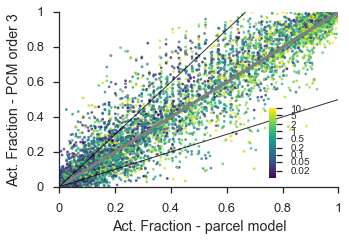

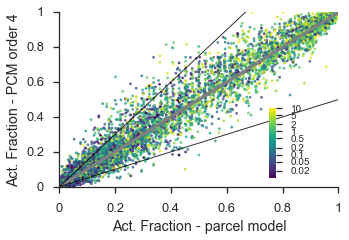

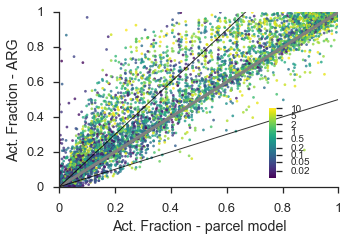

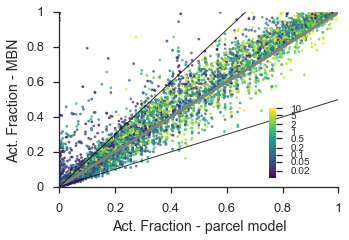

In [231]:
# Activated Fraction

var_name = "actfrac"
var_label = 'Act. Fraction'
lims = 0., 1.

modes = ['ACC', 'MOS', 'MBS']
if exp_name == 'MARC_gCCN':
    modes += ['DST01', 'DST02', 'SSLT01']
total_N = np.sum([10.**results_df['logN_' + mode] for mode in modes],
                 axis=0)
parcel_data = np.power(10., results_df["Neq"+"_parcel"])/total_N

coloring = np.power(10., results_df['logV'])
coloring_ticks = [0.02, 0.05, 0.1, 0.2, 0.5, 1., 2.0, 5., 10.]

param_settings = [
    # ( name, label )
    (exp_base+'_3', 'PCM order 3'),
    (exp_base+'_4', 'PCM order 4'),
    ('ARG', 'ARG'),
    ('MBN', 'MBN'),
]
for param_name, param_label in param_settings:
    print(param_name)
    scheme_data = np.power(10., results_df["Nderiv"+"_"+param_name])/\
                  total_N
    
    # Mask egregious outlier data
    data_df = pd.DataFrame({'scheme': scheme_data,
                            'parcel': parcel_data,
                            'coloring': coloring})

    # Note that the data is all log data, so we're masking truly outlier
    # points here
    data_df[data_df > 1e10] = np.nan
    data_df[data_df < 0.] = np.nan
    data_df.dropna(inplace=True)
#     data_df.iloc[:10]
    
    fig, ax = pu.plot_oneone(data_df['parcel'], data_df['scheme'],
                             var_label, param_label,
                             color_data=data_df['coloring'], 
                             color_ticks=coloring_ticks,
                             color_bar=True, lims=lims, loglog=False)

    fig_fn = "{}_oneone.{}.{}".format(var_name, param_name, exp_name)
    plt.savefig("figs/"+fig_fn+".png", transparent=True, bbox_inches='tight',
                dpi=200)
    plt.savefig("figs/"+fig_fn+".pdf", transparent=True, bbox_inches='tight')

---


Indicate we're done by "touching" a temporary file.

In [232]:
%%bash
date > oneone